<h1 style="text-align: center;"><strong>ENCS5341 Assignment 2 Solution</strong></h1>

<h2 style="text-align: left;"><strong>Student Name:</strong> Nidal Zabade</h2>
<h2 style="text-align: left;"><strong>Student ID:</strong> 1200153</h2>


In this assignment, we will perform model selection and hyper-parameters tunning, The `data_reg.csv` file contains a set of 200 examples. Each row represents one
example which has two attributes x1 and x2, and a continuous target label y.


### 1- Read the data from the csv file and split it into training set (the first 120 examples), validation set (the next 40 examples), and testing set (the last 40 examples). Plot the examples from the three sets in a scatter plot (each set encoded with a different color). Note that the plot here will be 3D plot where the x and y axes represent the x1 and x2 features, whereas the z-axis is the target label y.


#### Importing the required libraries


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

#### Reading the dataset


In [23]:
df = pd.read_csv("data_reg.csv")
df.head()

,x1,x2,y
0,0.548814,0.311796,0.547818
1,0.715189,0.696343,0.576032
2,0.602763,0.377752,0.113475
3,0.544883,0.179604,1.072286
4,0.423655,0.024679,0.624525


#### Check for number of records and columns, and check for null values


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      200 non-null    float64
 1   x2      200 non-null    float64
 2   y       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


### **The dataset has `200` examples with no null values**


#### Splitting the dataset into training, validation and testing sets


In [25]:
# Splitting the dataset into training, validation, and testing sets

# 1- split the dataset (200 example) into training and testing sets (80% training=160 example, 20% testing=40 examples)
train_set, test_set = train_test_split(df, test_size=0.2, shuffle=False)

# 2- split the training set (160 example) into training and validation sets (60% training=120 examples, 20% validation=40 examples)
train_set, val_set = train_test_split(train_set, test_size=0.25, shuffle=False)

# check the size of each set
print("Training set size:", len(train_set))
print("Validation set size:", len(val_set))
print("Testing set size:", len(test_set))

Training set size: 120
Validation set size: 40
Testing set size: 40


#### plotting the training, validation and testing sets in a 3D plot each encoded with a different color


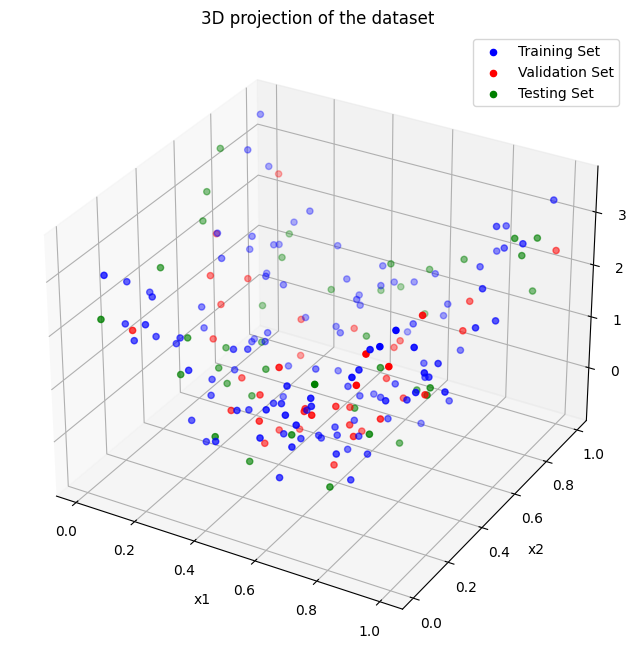

In [26]:
fig = plt.figure(figsize=(10, 8))
# Create the 3D plot
ax = fig.add_subplot(111, projection="3d")

# Plotting the training set with blue color
ax.scatter(
    train_set["x1"], train_set["x2"], train_set["y"], c="blue", label="Training Set"
)

# Plotting the validation set with red color
ax.scatter(val_set["x1"], val_set["x2"], val_set["y"], c="red", label="Validation Set")

# Plotting the testing set with green color
ax.scatter(
    test_set["x1"], test_set["x2"], test_set["y"], c="green", label="Testing Set"
)

# Set labels and title
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_title("3D projection of the dataset")
ax.legend()
plt.show()

### 2- Apply polynomial regression on the training set with degrees in the range of 1 to 10. Which polynomial degree is the best? Justify your answer by plotting the validation error vs polynomial degree curve. For each model plot the surface of the learned function alongside with the training examples on the same plot. (hint: you can use `PolynomialFeatures` and `LinearRegression` from `scikit-learn` library)


#### Make an array of degrees from 1 to 10 called `degrees`, and an empty list called `validation_mse` to store the validation errors for each degree and an empty list called `train_mse` to store the trained errors for each degree, we use mean squared error as a metric for the errors


In [27]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_mse = []
validation_mse = []

#### Create a functoin called `polynomial_regression` that takes the degree as an input and returns the trained model, the predicted values and the mean squared error for the training and validation sets


In [28]:
def polynomial_regression(degree):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(train_set[["x1", "x2"]])
    X_val_poly = poly_features.transform(val_set[["x1", "x2"]])

    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, train_set["y"])

    # Predict on training and validation sets
    train_pred = model.predict(X_train_poly)
    val_pred = model.predict(X_val_poly)

    # Calculate mean squared error
    model_train_mse = mean_squared_error(train_set["y"], train_pred)
    model_val_mse = mean_squared_error(val_set["y"], val_pred)

    return poly_features, model, train_pred, val_pred, model_train_mse, model_val_mse

#### Loop over the degrees and call the `polynomial_regression` function for each degree and append the errors to the `train_mse` and `validation_mse` lists then plot the validation error vs polynomial degree curve


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


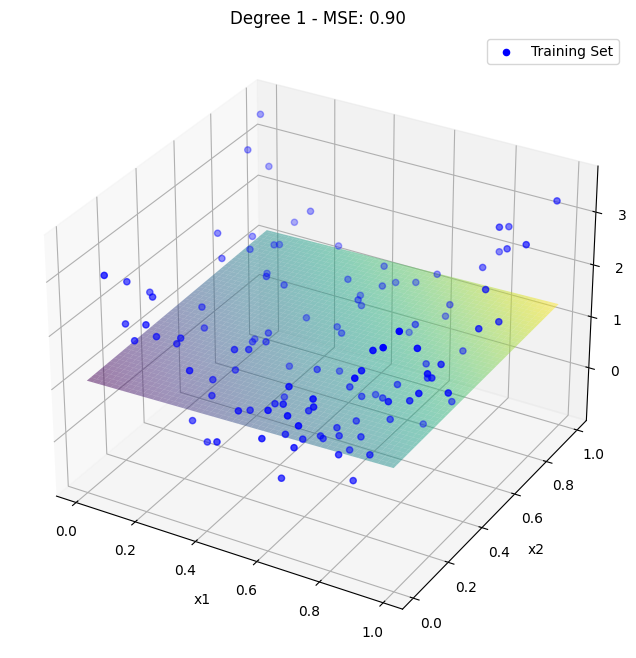

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


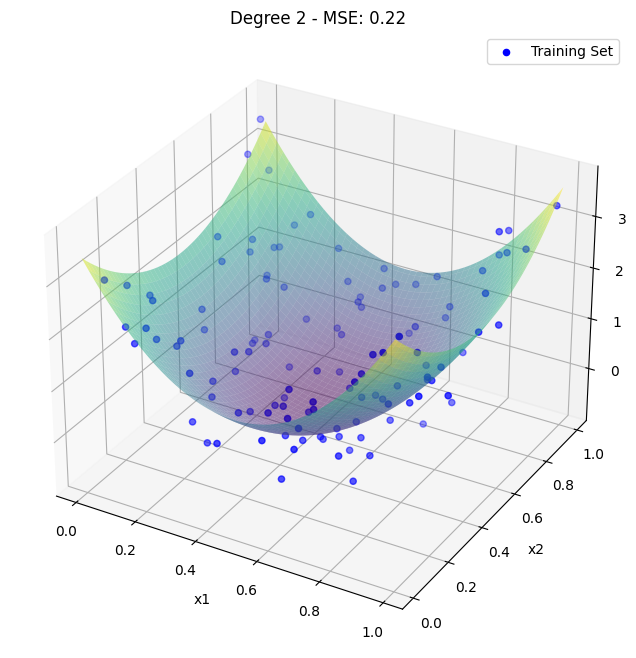

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


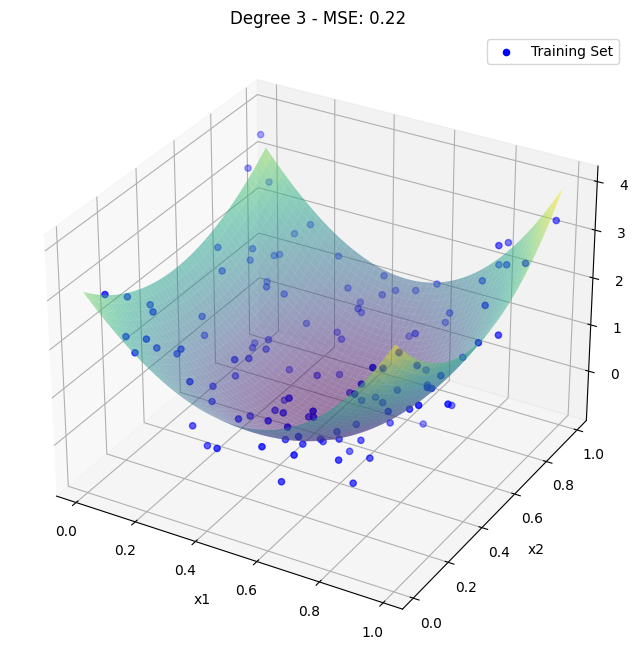

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


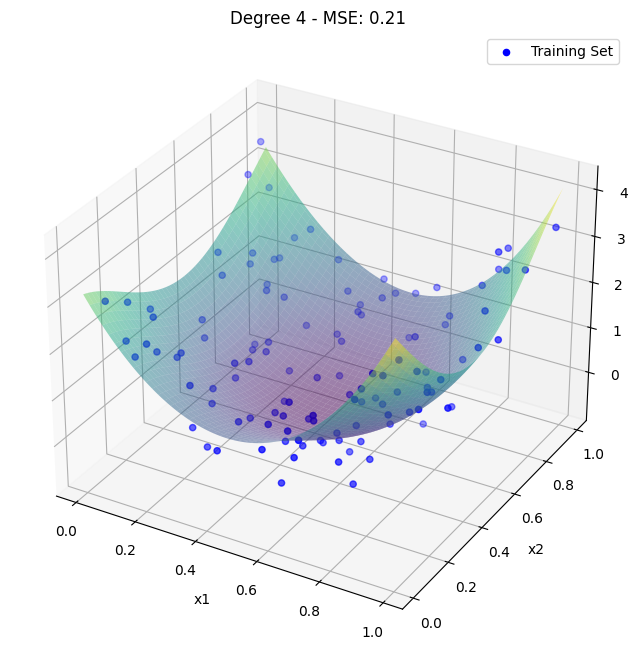

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


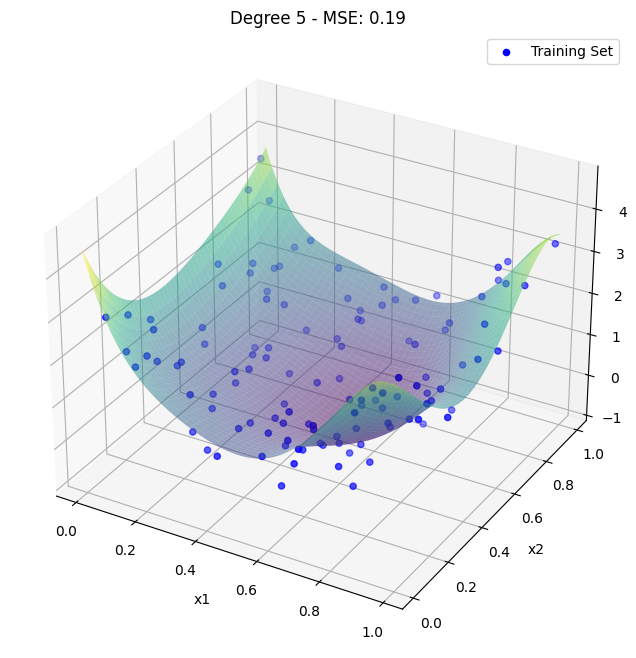

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


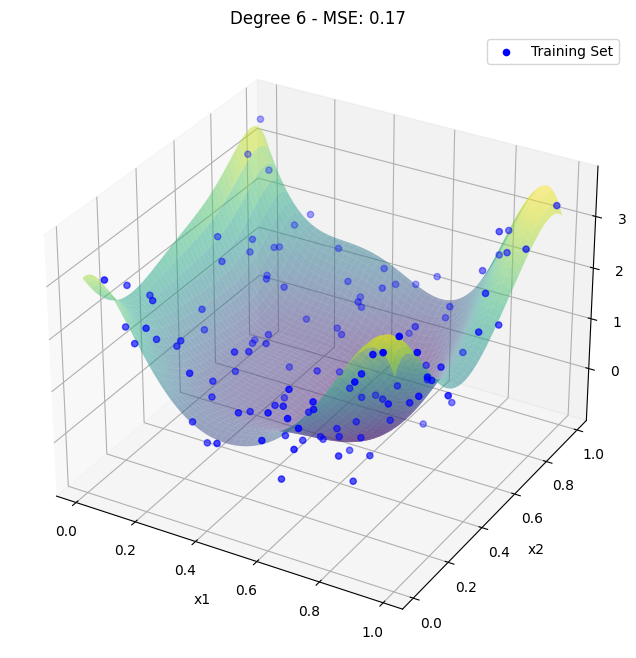

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


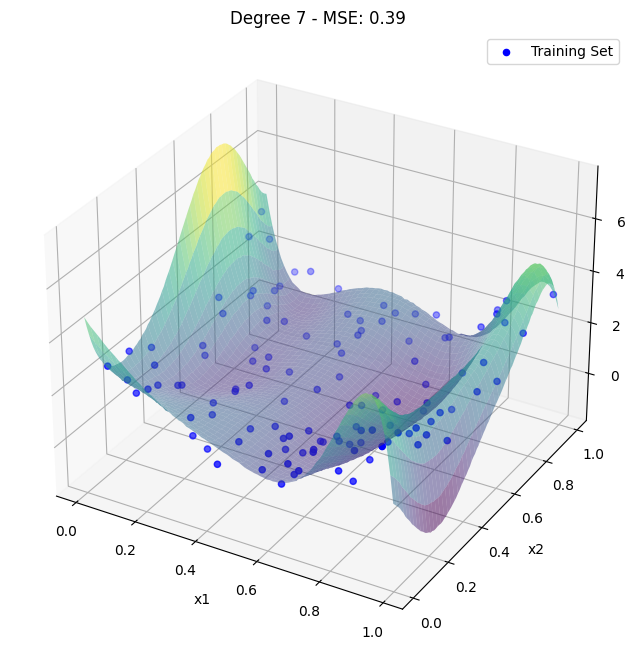

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


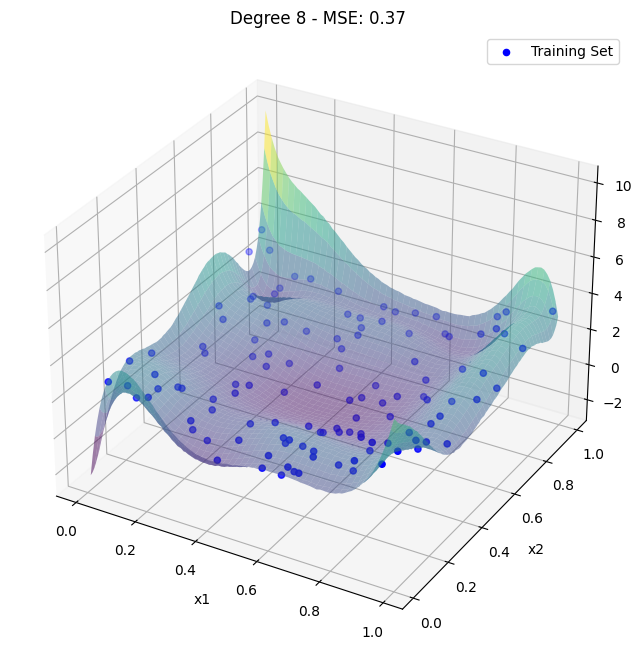

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


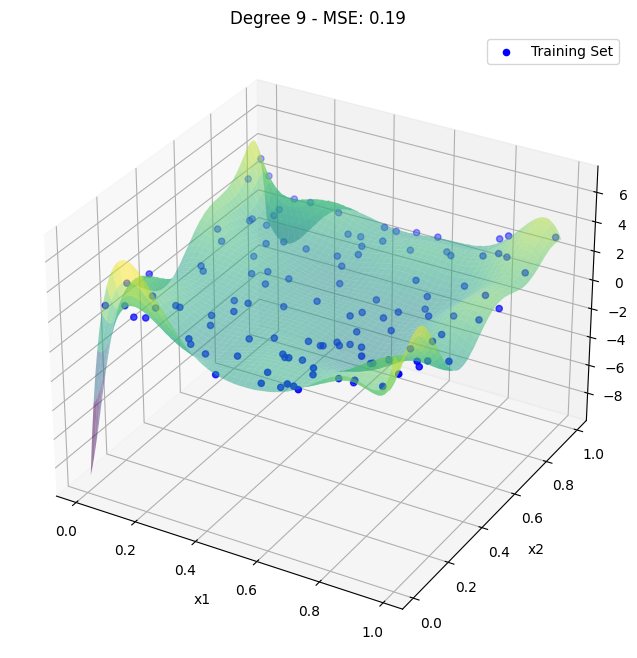

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


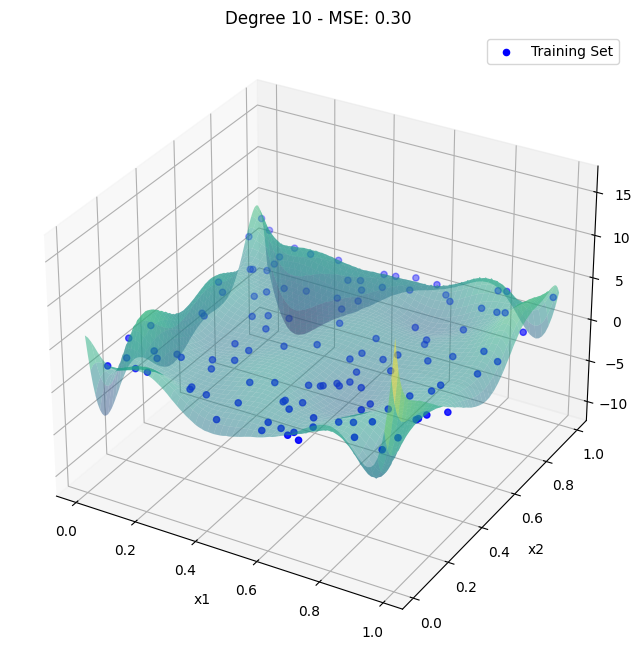

In [29]:
# Loop over the degrees
for degree in degrees:
    # Call the polynomial_regression function
    (
        poly_features,
        model,
        train_pred,
        val_pred,
        model_train_mse,
        model_val_mse,
    ) = polynomial_regression(degree)

    # Append the MSE value to the list
    train_mse.append(model_train_mse)
    validation_mse.append(model_val_mse)

    # Plot the surface of the learned function alongside the training examples
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    # Plot the training examples
    ax.scatter(
        train_set["x1"], train_set["x2"], train_set["y"], c="blue", label="Training Set"
    )

    # Create a meshgrid for the surface plot
    x1, x2 = np.meshgrid(
        np.linspace(train_set["x1"].min(), train_set["x1"].max(), 100),
        np.linspace(train_set["x2"].min(), train_set["x2"].max(), 100),
    )
    grid = np.c_[x1.ravel(), x2.ravel()]
    grid_poly = poly_features.transform(grid)
    y_pred = model.predict(grid_poly)
    y_pred = y_pred.reshape(x1.shape)

    # Plot the surface of the learned function
    ax.plot_surface(x1, x2, y_pred, cmap="viridis", alpha=0.5)

    # Set labels and title
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    ax.set_title(f"Degree {degree} - MSE: {model_train_mse:.2f}")
    ax.legend()
    plt.show()

#### Plot the validation error vs polynomial degree curve


Training MSE: [0.9006121317739972, 0.22435440293533962, 0.21864141873948484, 0.2109269891731982, 0.18598939809436305, 0.16811103382202133, 0.3870384547211623, 0.3735595959312556, 0.19143838868012183, 0.29746854492018276]
Validation MSE: [0.911824583849479, 0.17990349576391815, 0.2024332725287569, 0.23268739290547966, 0.22998004318855672, 0.22539808216994373, 0.9890112652181108, 0.3730657133057957, 0.34038121895185547, 1.6855103035270538]


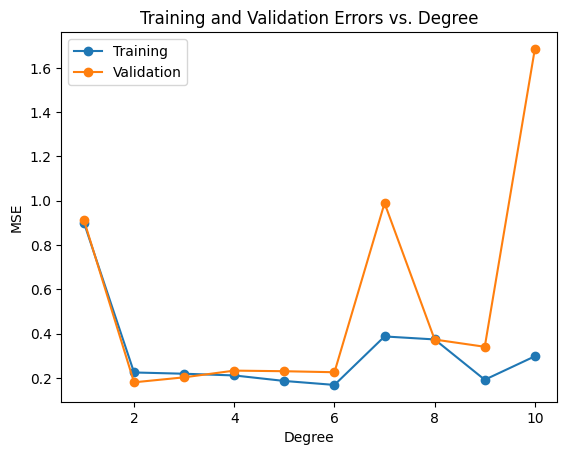

In [30]:
print("Training MSE:", train_mse)
print("Validation MSE:", validation_mse)
# Plot the training and validation errors vs. degree as points
plt.plot(degrees, train_mse, "o-", label="Training")
plt.plot(degrees, validation_mse, "o-", label="Validation")

# Set labels and title
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.title("Training and Validation Errors vs. Degree")
plt.legend()
plt.show()

### **As we can see from the plot above, the best polynomial degree is `2` because it has the lowest mean squared error on the validation set**


### 3- Apply ridge regression on the training set to fit a polynomial of degree 8. For the regularization parameter, choose the best value among the following options: {0.001, 0.005, 0.01, 0.1, 10}. Plot the MSE on the validation vs the regularization parameter. (hint: you can use `Ridge` regression implementation from `scikit-learn`)


#### Define the degrees and the Ridge parameters and create an empty list called `mse_values` to store the MSE values for each parameter


In [31]:
degree = 8
ridge_model_params = [0.001, 0.005, 0.01, 0.1, 10]
mse_values = {}

#### Create a function called `ridge_regression` that takes the alpha as inputs and returns the trained model, the predicted values and the mean squared error for the training and validation sets


In [32]:
def ridge_regression(alpha):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(train_set[["x1", "x2"]])
    X_val_poly = poly_features.transform(val_set[["x1", "x2"]])

    # Train the model
    model = Ridge(alpha=alpha)
    model.fit(X_train_poly, train_set["y"])

    # Predict on validation set
    val_pred = model.predict(X_val_poly)

    # Calculate mean squared error
    model_val_mse = mean_squared_error(val_set["y"], val_pred)

    return model, val_pred, model_val_mse

#### Loop over the Ridge parameters and call the `ridge_regression` function for each parameter and append the errors to the `mse_values` list


In [33]:
for alpha in ridge_model_params:
    model, val_pred, model_val_mse = ridge_regression(alpha)
    mse_values[alpha] = model_val_mse

#### Plot the MSE on the validation vs the regularization parameter


MSE values: {0.001: 0.21328335916736343, 0.005: 0.2110332820264636, 0.01: 0.20996554038850396, 0.1: 0.23545304328552383, 10: 0.5038254258404573}
Best alpha value: 0.01


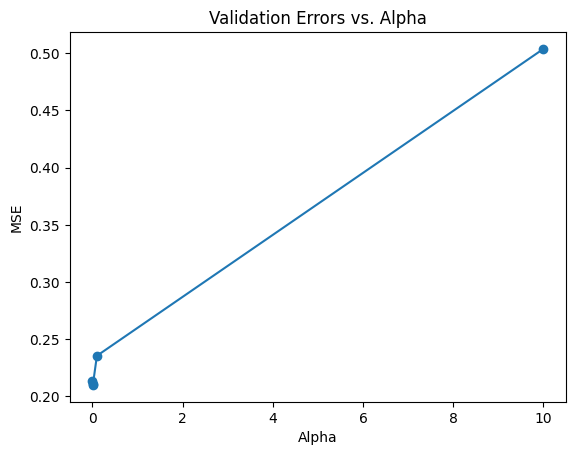

In [34]:
print("MSE values:", mse_values)

# print the best alpha value
print("Best alpha value:", min(mse_values, key=mse_values.get))

# Plot the MSE values
plt.plot(mse_values.keys(), mse_values.values(), "o-")

# Set labels and title
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("Validation Errors vs. Alpha")
plt.show()

### **As we can see from the plot above, the best regularization parameter is `0.1` because it has the lowest mean squared error**


## Logistic Regression

### The `train_cls.csv file` contains a set of training examples for a binary classification problem, and the testing examples are provided in the `test_cls.csv` file.


#### 1- using the logistic regression implementation of `scikit-learn` library, Learn a logistic regression model with a linear decision boundary. Draw the decision boundary of the learned model on a scatterplot of the training set (similar to Figure 1). Compute the training and testing accuracy of the learned model.


#### Reading the dataset


In [35]:
train_cls_df = pd.read_csv("train_cls.csv")

In [36]:
test_cls_df = pd.read_csv("test_cls.csv")

#### Splitting the dataset into training and testing sets


In [37]:
# Splitting the dataset into training and testing sets
X_train = train_cls_df.drop("class", axis=1)
y_train = train_cls_df["class"]
X_test = test_cls_df.drop("class", axis=1)
y_test = test_cls_df["class"]
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

#### Create a logistic regression model and fit it to the training set, then predict the testing set


In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test and train sets
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate accuracy (boundaries)
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.6612903225806451
Testing Accuracy: 0.6818181818181818


#### plot the decision boundary of the learned model on a scatterplot of the training set


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


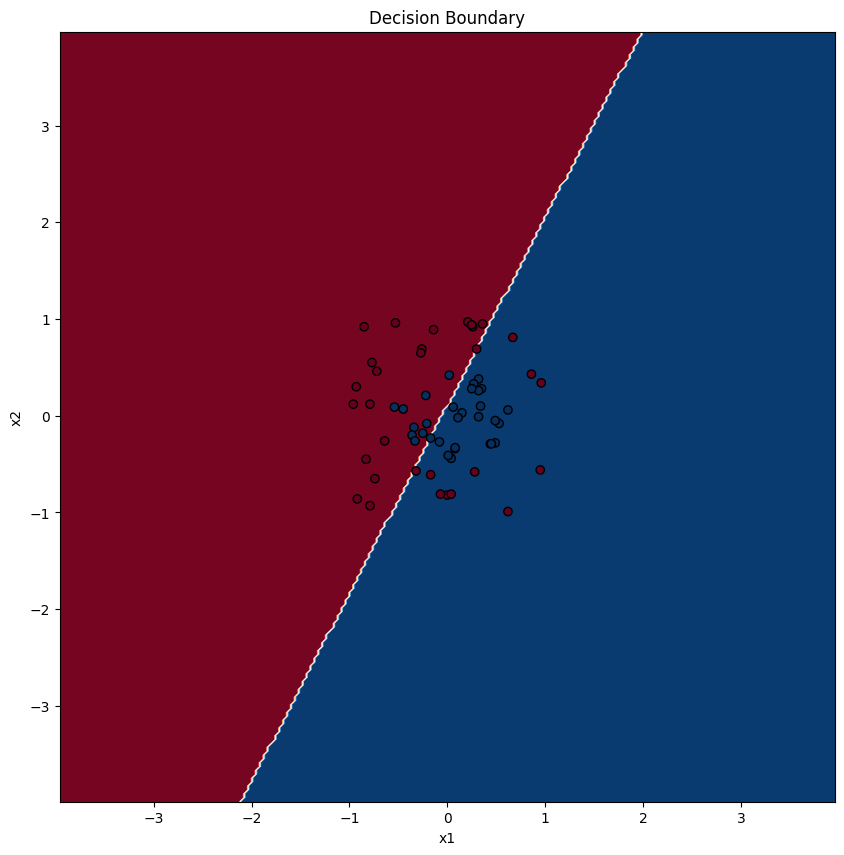

In [39]:
x1, x2 = np.meshgrid(
    np.linspace(X_train["x1"].min() - 3, X_train["x1"].max() + 3, 200),
    np.linspace(X_train["x2"].min() - 3, X_train["x2"].max() + 3, 200),
)
grid = np.c_[x1.ravel(), x2.ravel()]
preds = model.predict(grid).reshape(x1.shape)

plt.figure(figsize=(10, 10))
plt.contourf(x1, x2, preds, 25, cmap="RdBu")
plt.scatter(X_train["x1"], X_train["x2"], c=y_train, cmap="RdBu", edgecolor="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary")
plt.show()

#### 2- Repeat part 1 but now to learn a logistic regression model with quadratic decision boundary.


#### Create polynomial features of degree 2


In [40]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

#### Create a logistic regression model and fit it to the training set, then predict the testing set


In [41]:
model = LogisticRegression()
model.fit(X_train_poly, y_train)

# Predict on the test and train sets
train_pred = model.predict(X_train_poly)
test_pred = model.predict(X_test_poly)

# Calculate accuracy (boundaries)
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.967741935483871
Testing Accuracy: 0.9545454545454546


#### plot the decision boundary of the learned model on a scatterplot of the training set


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


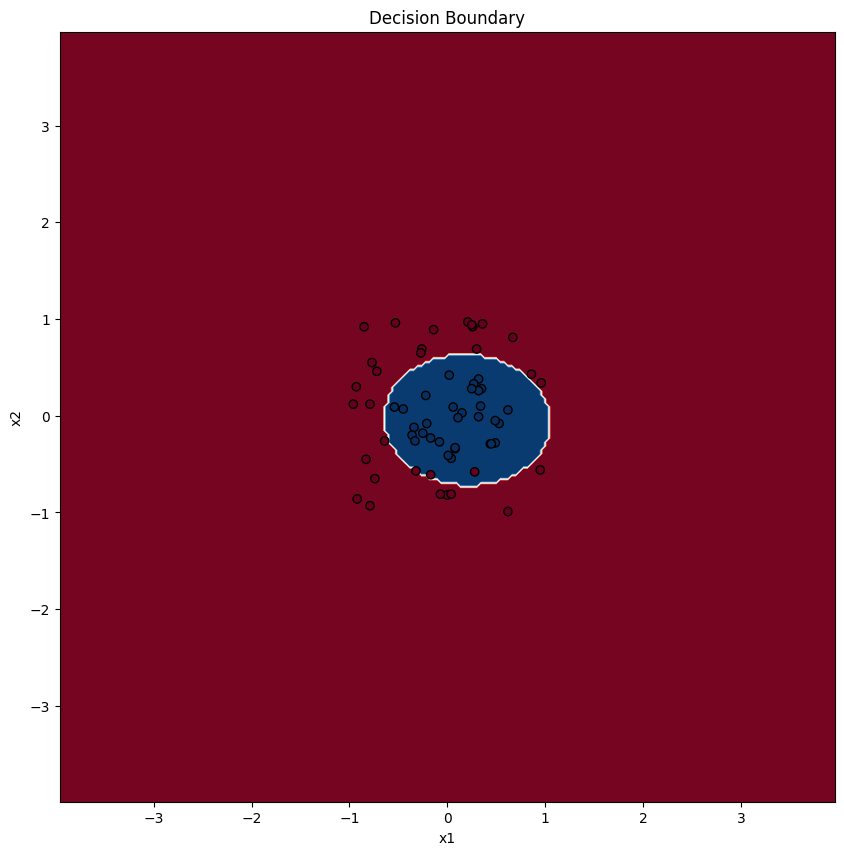

In [42]:
x1, x2 = np.meshgrid(
    np.linspace(X_train["x1"].min() - 3, X_train["x1"].max() + 3, 200),
    np.linspace(X_train["x2"].min() - 3, X_train["x2"].max() + 3, 200),
)
grid = np.c_[x1.ravel(), x2.ravel()]
grid_poly = poly_features.transform(grid)
preds = model.predict(grid_poly).reshape(x1.shape)

plt.figure(figsize=(10, 10))
plt.contourf(x1, x2, preds, 25, cmap="RdBu")
plt.scatter(X_train["x1"], X_train["x2"], c=y_train, cmap="RdBu", edgecolor="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary")
plt.show()

#### 3- Comment on the learned models in 1 and 2 in terms of overfitting underfitting.


### **The model in part 1 is `underfitting` because it has a low training and testing accuracy `Training Accuracy: 0.6612, Testing Accuracy: 0.6818`, and the model in part 2 is `neither overfitting nor underfitting` because it has a high training and testing accuracy `Training Accuracy: 0.9677, Testing Accuracy: 0.9545`**
